In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

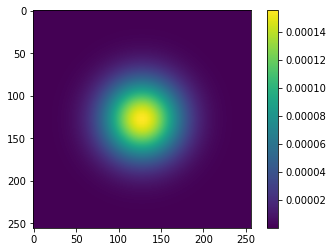

In [3]:
def gaussian(mean, sigma, size=[10, 10]):
    def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
        return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

    x = np.linspace(-size[0]//2, size[0]//2, num=size[0])
    y = np.linspace(-size[1]//2, size[1]//2, num=size[1])
    x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
    z = gaus2d(x, y, mean[0], mean[1], sigma, sigma)
    #z = z / z.max()
    return z
plt.imshow(gaussian([0, 0], 32, [256, 256]))
plt.colorbar()
plt.show()


def linear_oscillation(r1, r2, freq, timestep_count):
    timesteps = []
    fac = 1
    for f in range(int(freq * 2)):
        ts_count = int(timestep_count//(freq*2))
        for t in range(ts_count):
            if fac == 1:
                r3 = t/(ts_count) * r2[t] + (1. - t/(ts_count)) * r1[t]
            else:
                r3 = t/(ts_count) * r1[t] + (1. - t/(ts_count)) * r2[t]
            timesteps.append(r3)
        if fac == 1:
            fac = 0
        else:
            fac = 1
    return np.array(timesteps)

def rotate(mean, sigma, size, freq, timestep_count):
    timesteps = []
    angle_step = (360 * freq)/timestep_count
    for f in range(int(freq)):
        ts_count = int(timestep_count//(freq))
        for t in range(ts_count):
            im = gaussian(rotate_point(mean, rot_deg=t*angle_step), sigma, size)
            timesteps.append(im)
            continue
            theta = np.radians(t * angle_step)
            c, s = np.cos(theta), np.sin(theta)
            R = np.array(((c, -s), (s, c)))
            timesteps.append(gaussian(np.matmul(R, mean), sigma, size))
    return np.array(timesteps)


def rotate_point(p, origin=(0, 0), rot_deg=0):
    angle = np.deg2rad(rot_deg)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


def plot(run, figsize=(18, 4)):
    fig, axs = plt.subplots(1, run.shape[0], figsize=figsize)
    for i, ts in enumerate(run):
        axs[i].imshow(ts, vmin=run.min(), vmax=run.max())
        axs[i].set_title(f"r{i}")
        axs[i].set_axis_off()
    plt.show()

In [4]:
timestep_count = 256
global_size = np.array([256, 256])
global_sigma = 32
global_mean = np.array([0, 0])

In [5]:
# no change at all
def run1(mean, sigma, size):
    timesteps = []
    for t in range(timestep_count):
        timesteps.append(gaussian(mean, sigma, size))
    return np.array(timesteps)

# opposite of run1
def run2(mean, sigma, size):
    r1 = run1(mean, sigma, size)
    return r1.max() - r1

# linear interpolation between run1 and run2 with freq=0.5
def run3(mean, sigma, size):
    r1 = run1(mean, sigma, size)
    r2 = run2(mean, sigma, size)
    return linear_oscillation(r1, r2, 0.5, timestep_count)

# linear interpolation between run1 and run2 with freq=1
def run4(mean, sigma, size):
    r1 = run1(mean, sigma, size)
    r2 = run2(mean, sigma, size)
    return linear_oscillation(r1, r2, 1, timestep_count)

# linear interpolation between run1 and run2 with freq=2
def run5(mean, sigma, size):
    r1 = run1(mean, sigma, size)
    r2 = run2(mean, sigma, size)
    return linear_oscillation(r1, r2, 2, timestep_count)

# same as run1 but translated to lower right
def run6(mean, sigma, size):
    r1 = run1(mean + np.array([64, 64]), sigma, size)
    return r1

def run6rot(mean, sigma, size):
    r1 = rotate(mean + np.array([64, 64]), sigma, size, 2, timestep_count)
    return r1

# same as run1 but translated to lower left
def run7(mean, sigma, size):
    r1 = run1(mean + np.array([-64, 64]), sigma, size)
    return r1

def run7rot(mean, sigma, size):
    r1 = rotate(mean + np.array([-64, 64]), sigma, size, 2, timestep_count)
    return r1

# same as run1 but translated to lower right
def run8(mean, sigma, size):
    r1 = run1(mean + np.array([-64, -64]), sigma, size)
    return r1

def run8rot(mean, sigma, size):
    r1 = rotate(mean + np.array([-64, -64]), sigma, size, 2, timestep_count)
    return r1

# same as run1 but translated to lower right
def run9(mean, sigma, size):
    r1 = run1(mean + np.array([64, -64]), sigma, size)
    return r1

def run9rot(mean, sigma, size):
    r1 = rotate(mean + np.array([64, -64]), sigma, size, 2, timestep_count)
    return r1

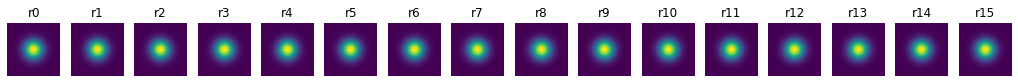

In [10]:
# run1
plot(run1(global_mean, global_sigma, global_size))

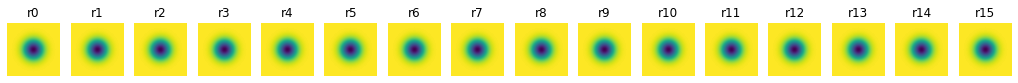

In [21]:
# run2
plot(run2(global_mean, global_sigma, global_size))

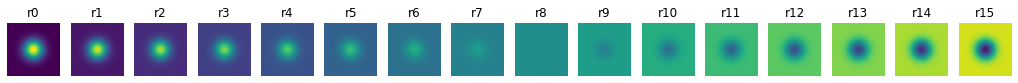

In [22]:
#run3    
plot(run3(global_mean, global_sigma, global_size))

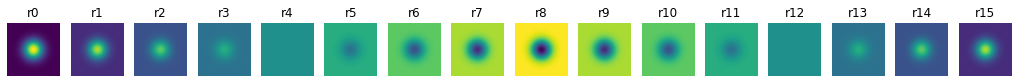

In [23]:
#run4
    
plot(run4(global_mean, global_sigma, global_size))

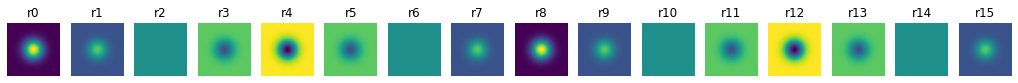

In [24]:
#run5

plot(run5(global_mean, global_sigma, global_size))


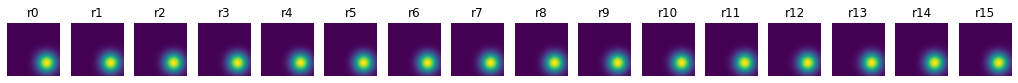

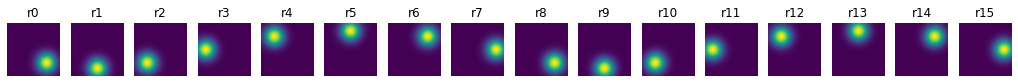

In [25]:
#run6 + rotation

plot(run6(global_mean, global_sigma, global_size))
plot(run6rot(global_mean, global_sigma, global_size))



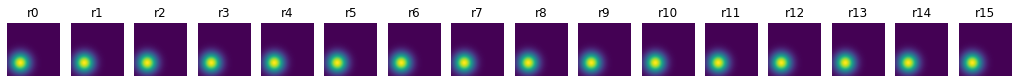

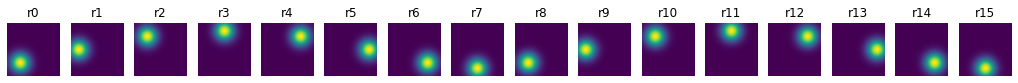

In [26]:
#run7 + rotation

plot(run7(global_mean, global_sigma, global_size))
plot(run7rot(global_mean, global_sigma, global_size))

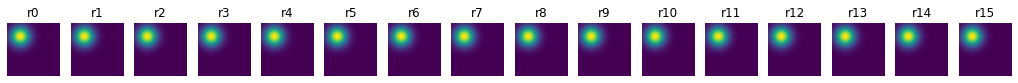

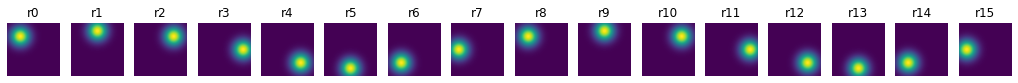

In [27]:
#run8 + rotation

plot(run8(global_mean, global_sigma, global_size))
plot(run8rot(global_mean, global_sigma, global_size))

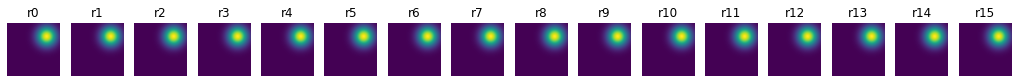

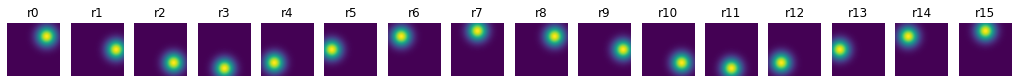

In [28]:
#run9 + rotation

plot(run9(global_mean, global_sigma, global_size))
plot(run9rot(global_mean, global_sigma, global_size))

# Make ensemble

In [6]:
ensemble = {
    "run{}".format("1".zfill(2)): run1(global_mean, global_sigma, global_size),
    "run{}".format("2".zfill(2)): run2(global_mean, global_sigma, global_size),
    "run{}".format("3".zfill(2)): run3(global_mean, global_sigma, global_size),
    "run{}".format("4".zfill(2)): run4(global_mean, global_sigma, global_size),
    "run{}".format("5".zfill(2)): run5(global_mean, global_sigma, global_size),
    "run{}".format("6".zfill(2)): run6(global_mean, global_sigma, global_size),
    "run{}_rot".format("6".zfill(2)): run6rot(global_mean, global_sigma, global_size),
    "run{}".format("7".zfill(2)): run7(global_mean, global_sigma, global_size),
    "run{}_rot".format("7".zfill(2)): run7rot(global_mean, global_sigma, global_size),
    #"run{}".format("8".zfill(2)): run8(global_mean, global_sigma, global_size),
    #"run{}_rot".format("8".zfill(2)): run8rot(global_mean, global_sigma, global_size),
    #"run{}".format("9".zfill(2)): run9(global_mean, global_sigma, global_size),
    #"run{}_rot".format("9".zfill(2)): run9rot(global_mean, global_sigma, global_size),
}

ensemble_path = 'data/synthetic/runs'
for run in tqdm(ensemble):
    if not os.path.exists(ensemble_path):
        os.makedirs(ensemble_path)
    for i, ts in enumerate(ensemble[run]):
        run_path = os.path.join(ensemble_path, run)
        if not os.path.exists(run_path):
            os.makedirs(run_path)
        ts = ts / ensemble[run].max()
        np.save(os.path.join(run_path, str(i).zfill(3)+ '.npy'), ts)

ensemble

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:18<00:00,  8.76s/it]


{'run01': array([[[1.74907513e-11, 1.98195797e-11, 2.24363893e-11, ...,
          2.24363893e-11, 1.98195797e-11, 1.74907513e-11],
         [1.98195797e-11, 2.24584829e-11, 2.54237109e-11, ...,
          2.54237109e-11, 2.24584829e-11, 1.98195797e-11],
         [2.24363893e-11, 2.54237109e-11, 2.87804426e-11, ...,
          2.87804426e-11, 2.54237109e-11, 2.24363893e-11],
         ...,
         [2.24363893e-11, 2.54237109e-11, 2.87804426e-11, ...,
          2.87804426e-11, 2.54237109e-11, 2.24363893e-11],
         [1.98195797e-11, 2.24584829e-11, 2.54237109e-11, ...,
          2.54237109e-11, 2.24584829e-11, 1.98195797e-11],
         [1.74907513e-11, 1.98195797e-11, 2.24363893e-11, ...,
          2.24363893e-11, 1.98195797e-11, 1.74907513e-11]],
 
        [[1.74907513e-11, 1.98195797e-11, 2.24363893e-11, ...,
          2.24363893e-11, 1.98195797e-11, 1.74907513e-11],
         [1.98195797e-11, 2.24584829e-11, 2.54237109e-11, ...,
          2.54237109e-11, 2.24584829e-11, 1.98195797e-11]